In [230]:
%matplotlib inline
import pandas as pd
plt.ion()
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict

# Load the data

In [82]:
coffee_ratings = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv')
coffee_ratings.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [127]:
# coffee_ratings['variety'].isna().sum()
coffee_ratings['altitude_mean_meters']

0       2075.0
1       2075.0
2       1700.0
3       2000.0
4       2075.0
         ...  
1334       NaN
1335      40.0
1336     795.0
1337       NaN
1338       NaN
Name: altitude_mean_meters, Length: 1339, dtype: float64

## Select columns for modeling
We will seelct columns to use for modeling. Here it is a mixture of categorical and numerical variables. Rows with nan's will also be dropped leaving us with about 997 rows to use for modeling.

In [133]:
coffee_df = coffee_ratings[['total_cup_points',
                            'species',
                            'country_of_origin',
                            'variety',
                            'aroma',
                            'aftertaste',
                            'acidity',
                            'body',
                            'balance',
                            'sweetness',
                            'altitude_mean_meters']]
coffee_df = coffee_df.dropna()
coffee_df

,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters
1,89.92,Arabica,Ethiopia,Other,8.75,8.50,8.58,8.42,8.42,10.00,2075.00
2,89.75,Arabica,Guatemala,Bourbon,8.42,8.42,8.42,8.33,8.42,10.00,1700.00
4,88.83,Arabica,Ethiopia,Other,8.25,8.25,8.50,8.42,8.33,10.00,2075.00
9,88.25,Arabica,Ethiopia,Other,8.08,8.50,8.50,7.67,8.42,10.00,1822.50
11,87.92,Arabica,United States,Other,8.25,8.17,8.33,8.08,8.17,10.00,1872.00
...,...,...,...,...,...,...,...,...,...,...,...
1309,59.83,Arabica,Guatemala,Catuai,7.50,6.67,7.67,7.33,6.67,1.33,1417.32
1310,0.00,Arabica,Honduras,Caturra,0.00,0.00,0.00,0.00,0.00,0.00,1400.00
1319,82.50,Robusta,India,Other,7.67,7.58,7.83,7.83,8.00,7.92,1000.00
1322,81.58,Robusta,India,Other,7.67,7.75,7.50,7.75,7.58,7.75,1000.00


Categorical columns like species, country of origin, and variety need to be converted from categorical typies to numerical values for modeling.

In [152]:
# coffee_df["species"]
ord_enc = OrdinalEncoder()
coffee_df["species"] = ord_enc.fit_transform(coffee_df[["species"]])
coffee_df["country_of_origin"] = ord_enc.fit_transform(coffee_df[["country_of_origin"]])
coffee_df["variety"] = ord_enc.fit_transform(coffee_df[["variety"]])

# View the relation between the variables
With a pairplot we can see the marginal and join distributions of the features with which we are working.

Features like aroma, aftertaste, acidity, body, and balance exist in a fairly narrow range amongst variables like variety and country of origin. Interestingly the country of origin and variaty seem to have no strong relation with each other whatsoever. Furthermore, most of the coffees in this dataset appear to be grown at fairly low altitudes. Overall, there doesn't seem to be any strong correlations between the features.

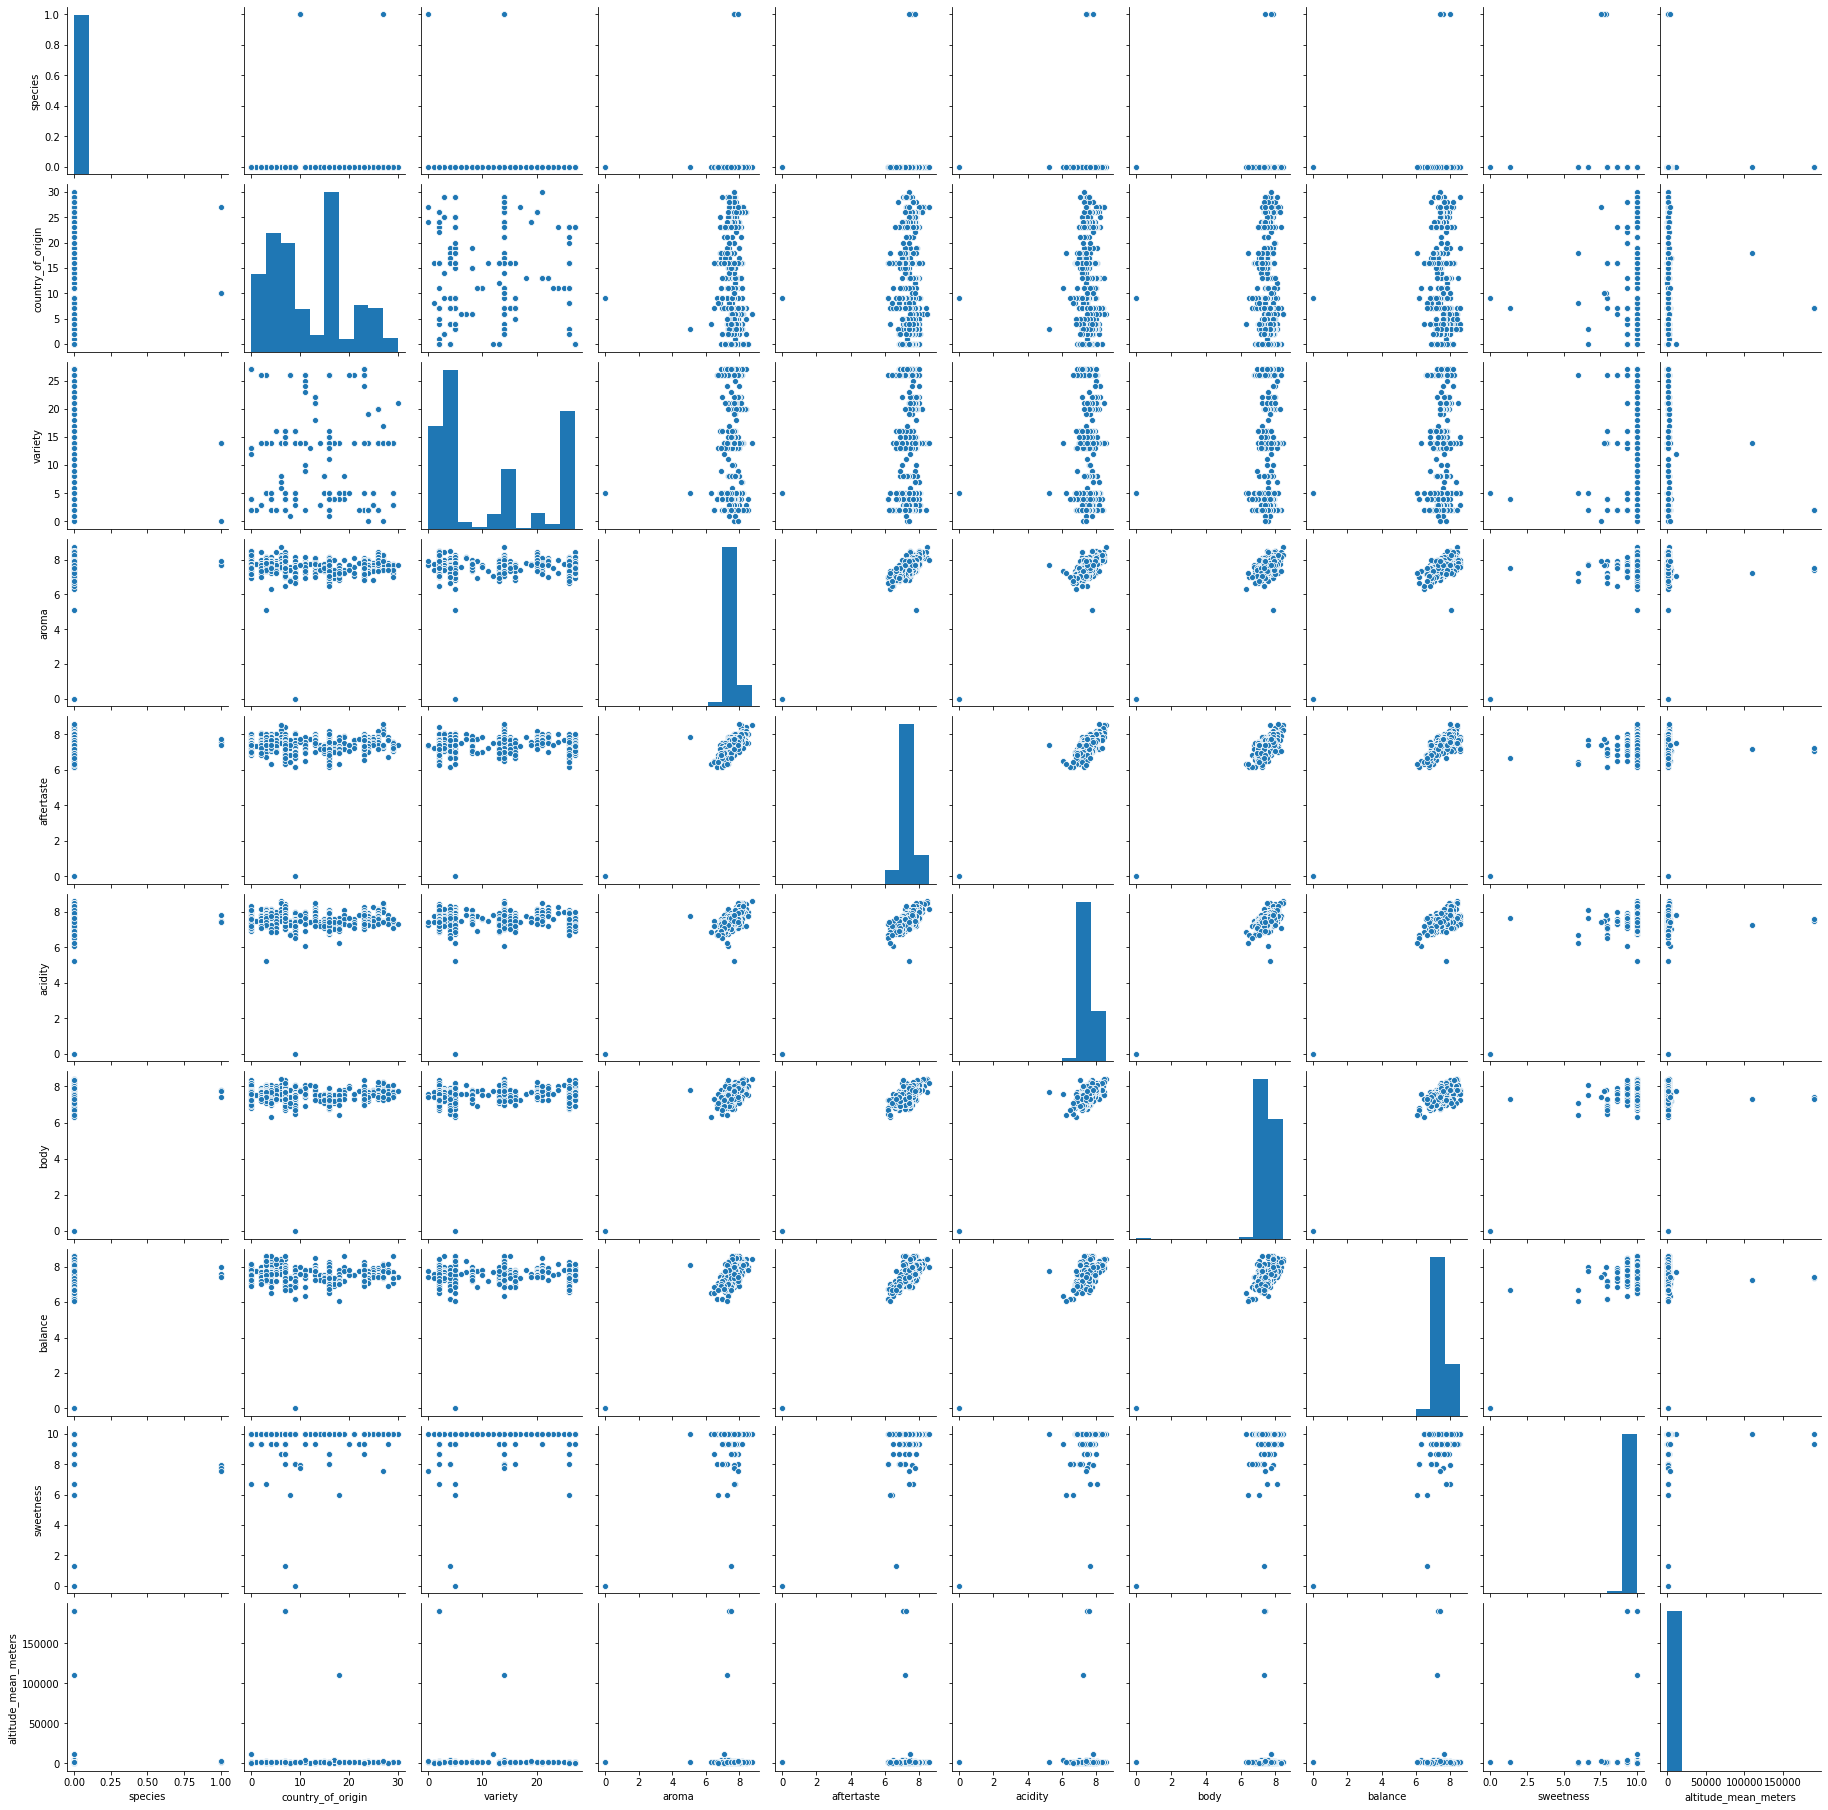

In [162]:
seaborn.pairplot(coffee_df.drop('total_cup_points', axis = 1)) 

We can also construct a correlation matrix from the dataframe to view the correlations between the features.

The features from aroma to sweetneess appear to have a strong positive correlation with the total cup points. These features also appear to have strong positive correlations amonst themselves. Furthermore, the categorical variables appear to be negatively correlated with each other and the total cupping points. Interestingly there is a strong negetive correlation between sweetness and species and country of rigin and balance.

<AxesSubplot:>

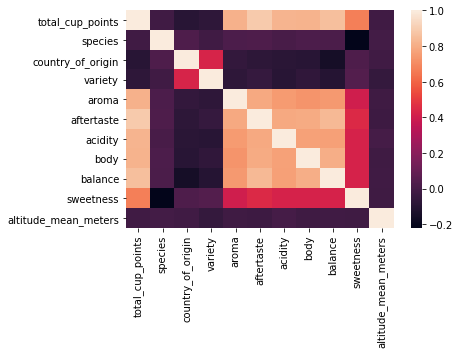

In [168]:
seaborn.heatmap(coffee_df.corr(),
                xticklabels=coffee_df.columns,
                yticklabels=coffee_df.columns)

Let us determine the number of unique scores in this dataset. There appears to be 180. I will reduce this to three to split the ratings into: high, average, low ratings.

In [173]:
len(coffee_df['total_cup_points'].unique())

150

Let's also view the distribution of the results to determine cutoffs for the three categories.

Text(0, 0.5, 'Count')

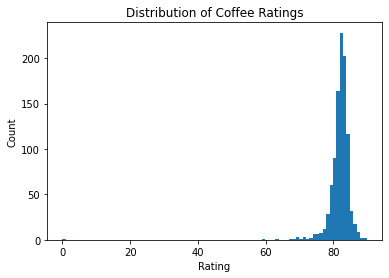

In [174]:
plt.hist(coffee_df['total_cup_points'], bins = 90)
plt.title("Distribution of Coffee Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

In [175]:
rating_pctile = np.percentile(coffee_df['total_cup_points'], [33, 66])
rating_pctile

array([81.67, 83.17])

## Create new column to create new assignments to the ratings
Anything in lower third will have rating 1
Anything in middle third will have rating 2
Anything in upper third will have rating 3

In [176]:
coffee_df['n_rating'] = 0
coffee_df['n_rating'] = np.where(coffee_df['total_cup_points'] < rating_pctile[0], 1, coffee_df['n_rating'])
coffee_df['n_rating'] = np.where((coffee_df['total_cup_points'] >= rating_pctile[0]) & (coffee_df['total_cup_points'] <= rating_pctile[1]), 2, coffee_df['n_rating'])
coffee_df['n_rating'] = np.where(coffee_df['total_cup_points'] > rating_pctile[1], 3, coffee_df['n_rating'])

In [177]:
coffee_dfb

,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,n_rating
1,89.92,0.0,6.0,14.0,8.75,8.50,8.58,8.42,8.42,10.00,2075.00,3
2,89.75,0.0,7.0,2.0,8.42,8.42,8.42,8.33,8.42,10.00,1700.00,3
4,88.83,0.0,6.0,14.0,8.25,8.25,8.50,8.42,8.33,10.00,2075.00,3
9,88.25,0.0,6.0,14.0,8.08,8.50,8.50,7.67,8.42,10.00,1822.50,3
11,87.92,0.0,27.0,14.0,8.25,8.17,8.33,8.08,8.17,10.00,1872.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1309,59.83,0.0,7.0,4.0,7.50,6.67,7.67,7.33,6.67,1.33,1417.32,1
1310,0.00,0.0,9.0,5.0,0.00,0.00,0.00,0.00,0.00,0.00,1400.00,1
1319,82.50,1.0,10.0,14.0,7.67,7.58,7.83,7.83,8.00,7.92,1000.00,2
1322,81.58,1.0,10.0,14.0,7.67,7.75,7.50,7.75,7.58,7.75,1000.00,1


## View distribution of n_rating

(array([322.,   0.,   0.,   0.,   0., 362.,   0.,   0.,   0., 313.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

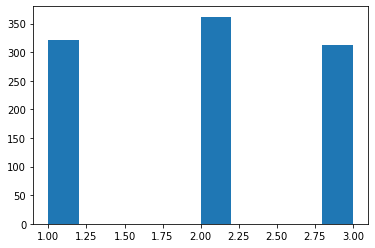

In [212]:
plt.hist(coffee_df['n_rating'])

In [182]:
coffee_df.drop(['total_cup_points', 'n_rating'], axis = 1)

,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters
1,0.0,6.0,14.0,8.75,8.50,8.58,8.42,8.42,10.00,2075.00
2,0.0,7.0,2.0,8.42,8.42,8.42,8.33,8.42,10.00,1700.00
4,0.0,6.0,14.0,8.25,8.25,8.50,8.42,8.33,10.00,2075.00
9,0.0,6.0,14.0,8.08,8.50,8.50,7.67,8.42,10.00,1822.50
11,0.0,27.0,14.0,8.25,8.17,8.33,8.08,8.17,10.00,1872.00
...,...,...,...,...,...,...,...,...,...,...
1309,0.0,7.0,4.0,7.50,6.67,7.67,7.33,6.67,1.33,1417.32
1310,0.0,9.0,5.0,0.00,0.00,0.00,0.00,0.00,0.00,1400.00
1319,1.0,10.0,14.0,7.67,7.58,7.83,7.83,8.00,7.92,1000.00
1322,1.0,10.0,14.0,7.67,7.75,7.50,7.75,7.58,7.75,1000.00


# Split the data into training and testing sets

In [185]:
X = coffee_df.drop(['total_cup_points', 'n_rating'], axis = 1)
y = coffee_df['n_rating']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)

## Normalize the features

In [189]:
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(training), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(testing), columns = X.columns)

# Random Forest Classifier

In [222]:
clf=RandomForestClassifier()
clf.fit(training, training_labels)

RandomForestClassifier()

In [223]:
preds = clf.predict(testing)

In [224]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(testing_labels, preds))

Accuracy: 0.84


# Finding important features from random forest

In [225]:
pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)

,0
balance,0.235632
aftertaste,0.208385
acidity,0.140816
body,0.138380
aroma,0.110105
altitude_mean_meters,0.066992
country_of_origin,0.038439
variety,0.030405
sweetness,0.029093
species,0.001753


## Evaluating Results
A confusion matrix shows the combination of the actual and predicted classes. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class. It is a good measure of whether models can account for the overlap in class properties and understand which classes are most easily confused.


In [226]:
metrics.confusion_matrix(testing_labels, preds,  labels = [1, 2, 3])

array([[70, 11,  1],
       [ 3, 75,  9],
       [ 0, 16, 65]])

# Optimizing the random forest

In [232]:
# Number of trees in random forest
n_estimators = [100, 200, 300, 400, 500, 800, 1000, 1500, 2000, 2500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']


random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

random_grid

{'n_estimators': [100, 200, 300, 400, 500, 800, 1000, 1500, 2000, 2500],
 'max_depth': [1, 5, 10, 20, 50, 75, 100, 150, 200, None],
 'min_samples_split': [2, 5, 10, 15, 20, 30],
 'min_samples_leaf': [1, 2, 3, 4],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

### Random Grid Search the parameter space defined above

In [237]:
import time

In [238]:
t1 = time.time()
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 10,
                               verbose=2,
                               random_state=42, n_jobs = 4)

rf_random.fit(training, training_labels)
t2 = time.time()

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  2.4min finished


In [242]:
print ("It took %s to run"%(str((t2-t1)/60)))

It took 2.3721139152844746 to run


In [243]:
# Best Parameters
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': True}

# Fine tune using the results from random grid search as a starting point
Use grid search

In [246]:
param_grid = {
    'n_estimators': [480, 490, 500, 510, 520],
    'bootstrap': [True],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [13, 14, 15, 16, 17],
    'criterion': ['entropy']
}

In [260]:
t3 = time.time()
# Base model
rf_grid = RandomForestClassifier()
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 10, n_jobs = 8, verbose = 2)
grid_rf_search.fit(training, training_labels)
t4 = time.time()

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   34.9s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done 1250 out of 1250 | elapsed:  4.9min finished


In [271]:
best_rf_grid = grid_rf_search.best_estimator_
best_rf_grid

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=16,
                       n_estimators=510)

In [261]:
print ("It took %s to run"%(str((t4-t3)/60)))

It took 4.893489297231039 to run


In [264]:
# Best Parameters
grid_rf_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_split': 16,
 'n_estimators': 510}

In [265]:
grid_preds = grid_rf_search.predict(testing)

In [266]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(testing_labels, grid_preds))

Accuracy: 0.84


In [272]:
# Feature Importance
pd.DataFrame(best_rf_grid.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)

,0
balance,0.260238
aftertaste,0.257989
acidity,0.145076
body,0.139215
aroma,0.110530
altitude_mean_meters,0.027632
sweetness,0.026082
country_of_origin,0.020456
variety,0.011191
species,0.001591


In [273]:
metrics.confusion_matrix(testing_labels, preds,  labels = [1, 2, 3])

array([[71,  9,  2],
       [ 3, 73, 11],
       [ 0, 18, 63]])